# Data-Driven Music History

In [1]:
import pandas as pd # for working with tabular data
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt # for plotting
plt.style.use("fivethirtyeight") # select specific plotting style
import seaborn as sns; sns.set_context("talk")
import numpy as np

## Research Questions

* General: How can we study historical changes quantitatively?
* Specific: What can we say about the history of tonality based on a dataset of musical pieces?

## A bit of theory

In [2]:
note_names = list("FCGDAEB") # diatonic note names in fifths ordering
note_names

['F', 'C', 'G', 'D', 'A', 'E', 'B']

In [3]:
accidentals = ["bb", "b", "", "#", "##"] # up to two accidentals is suffient here
accidentals

['bb', 'b', '', '#', '##']

In [4]:
lof = [ n + a for a in accidentals for n in note_names ] # lof = "Line of Fifths"
print(lof)

['Fbb', 'Cbb', 'Gbb', 'Dbb', 'Abb', 'Ebb', 'Bbb', 'Fb', 'Cb', 'Gb', 'Db', 'Ab', 'Eb', 'Bb', 'F', 'C', 'G', 'D', 'A', 'E', 'B', 'F#', 'C#', 'G#', 'D#', 'A#', 'E#', 'B#', 'F##', 'C##', 'G##', 'D##', 'A##', 'E##', 'B##']


In [5]:
len(lof) # how long is this line-of-fifths segment?

35

We call the elements on the line of fifths **tonal pitch-classes**

## Data

### A (kind of) large corpus: TP3C

Here, we use a dataset that was specifically compiled for this kind of analysis, the [**Tonal pitch-class counts corpus (TP3C)**](https://github.com/DCMLab/TP3C) (Moss, Neuwirth, Rohrmeier, 2020)

- 2,012 pieces
- 75 composers
- approx. spans 600 years of music history
- does not contain complete pieces but only counts of tonal pitch-classes

In [6]:
import pandas as pd # to work with tabular data

url = "https://raw.githubusercontent.com/DCMLab/TP3C/master/tp3c.tsv"
data = pd.read_table(url)

data.sample(10)

,composer,composer_first,work_group,work_catalogue,opus,no,mov,title,composition,publication,source,display_year,Fbb,Cbb,Gbb,Dbb,Abb,Ebb,Bbb,Fb,Cb,Gb,Db,Ab,Eb,Bb,F,C,G,D,A,E,B,F#,C#,G#,D#,A#,E#,B#,F##,C##,G##,D##,A##,E##,B##
1742,Corelli,Arcangelo,12 Trio Sonatas,Op.,3,4,1.0,NaN,NaN,1689.0,CCARH,1689.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,75,47,70,107,108,56,7,8,24,3,0,0,0,0,0,0,0,0
468,Bach,Johann Sebastian,Inventions and Sinfonias,BWV,779,NaN,NaN,NaN,NaN,1723.0,MS,1723.0,0,0,0,0,0,0,0,0,0,0,0,0,17,68,98,92,77,82,81,56,17,3,7,0,0,0,0,0,0,0,0,0,0,0,0
1630,Chopin,Frédéric,Mazurkas,Op.,33,2,NaN,NaN,1837.0,1838.0,CCARH,1837.0,0,0,0,0,0,0,0,0,0,24,16,15,17,44,48,32,117,397,388,251,123,153,155,54,0,0,10,0,0,0,0,0,0,0,0
1604,Joplin,Scott,Ragtimes,NaN,NaN,NaN,NaN,Lily Queen,NaN,1907.0,CCARH,1907.0,0,0,0,0,0,0,0,0,0,0,5,23,19,51,180,353,252,134,188,162,75,55,14,17,17,7,0,0,0,0,0,0,0,0,0
137,Bach,Johann Sebastian,Wohltemperiertes Klavier II,BWV,888,2,NaN,NaN,1740.0,NaN,MS,1740.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,13,69,108,101,112,105,114,101,45,16,10,7,0,0,0,0,0,0,0
1231,Schubert,Franz,Die schöne Müllerin,D. 795,NaN,18,NaN,Trockne Blumen,NaN,1823.0,OSLC,1823.0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,14,86,34,65,214,309,117,57,115,60,20,0,16,0,0,0,0,0,0,0
530,Brahms,Johannes,8 Klavierstücke,Op.,76,4,NaN,Intermezzo,1878.0,NaN,DCML,1878.0,0,0,0,0,0,0,0,43,18,64,21,31,213,113,65,62,42,70,34,9,20,4,26,6,0,0,0,0,0,0,0,0,0,0,0
1311,Schumann,Robert,Dichterliebe,Op.,48,3,NaN,"Die Rose, die Lilie, die Taube",1840.0,NaN,OSLC,1840.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,52,69,61,40,45,52,48,3,1,0,0,0,0,0,0,0,0,0,0
338,Bach,Johann Sebastian,Wohltemperiertes Klavier I,BWV,863,1,NaN,NaN,1722.0,NaN,MS,1722.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9,62,72,65,90,89,81,74,29,12,19,8,0,0,0,0,0
713,Fauré,Gabriel,NaN,Op.,6,2,NaN,Tristesse,NaN,1880.0,MS,1880.0,0,0,0,0,0,0,0,0,7,0,43,172,126,90,174,202,169,85,0,9,68,0,1,3,1,0,1,0,0,0,0,0,0,0,0


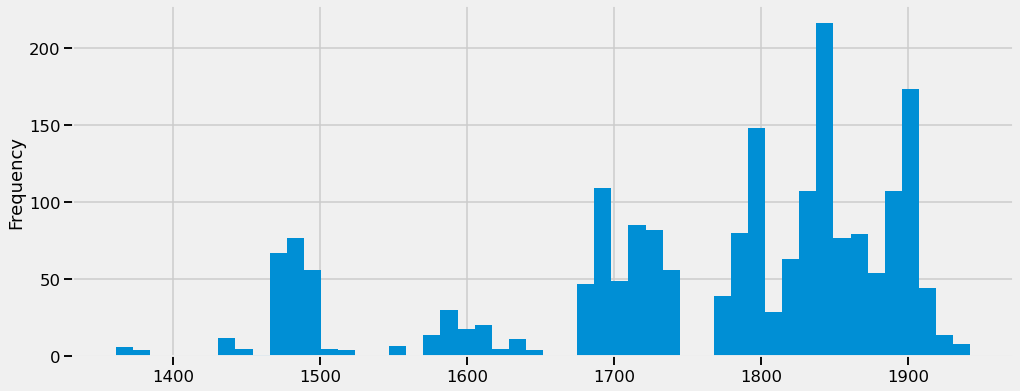

In [8]:
data["display_year"].plot(kind="hist", bins=50, figsize=(15,6)); # historical overview

- it can be seen that there are large gaps and that some historical periods are underrepresented
- however, it is not so obvious how to fix that
- do we want a uniform distribution over time?
- do we want a "historically accurate" distribution?
- do we want to remove geographical/gender/class/instrument/etc. biases? 
- on one hand, balanced datasets are likely not to reflect historical realities
- on the other hand, such datasets rather represent the "canon", that is a contemporary selection of "valuable" compositions that may differ greatly from what was considered relevant at the time

--> There is no unique objective answer to these questions. It is important to be aware of these limitations and take them into account when interpreting the results

For this workshop we ignore all the metadata about the pieces (titles, composer names etc.) but only focus on their tonal material. Therefore, we don't need all the columns of the table.

In [9]:
tpc_counts = data.loc[:, lof] # select all rows (":") and the lof columns
tpc_counts.sample(20)

,Fbb,Cbb,Gbb,Dbb,Abb,Ebb,Bbb,Fb,Cb,Gb,Db,Ab,Eb,Bb,F,C,G,D,A,E,B,F#,C#,G#,D#,A#,E#,B#,F##,C##,G##,D##,A##,E##,B##
155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,32,149,224,179,194,212,191,161,52,22,28,13,1,0,0,0,0
1073,0,0,0,0,0,0,0,0,11,23,83,189,219,114,229,225,323,163,41,58,126,72,26,0,0,0,0,0,0,0,0,0,0,0,0
1975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,42,70,31,16,36,21,1,0,0,0,0,0,0,0,0,0,0
1178,0,0,0,0,0,0,0,0,0,0,0,0,11,84,101,77,111,149,110,29,9,26,2,0,0,0,0,0,0,0,0,0,0,0,0
402,0,0,0,0,0,0,0,0,1,2,1,2,2,9,13,100,214,103,179,347,337,250,153,83,150,87,36,18,11,6,4,0,0,0,0
98,0,0,0,0,2,0,4,2,6,41,118,144,114,164,241,340,142,44,78,60,29,8,1,2,0,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,193,249,123,54,124,103,10,0,28,4,1,0,0,0,0,0,0,0,0,0
344,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,6,38,133,76,16,21,85,27,7,0,0,0,0,0,0,0,0,0,0
1784,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,71,68,45,39,48,33,10,0,2,0,0,0,0,0,0,0,0
407,0,0,0,0,0,0,0,0,0,0,0,3,0,11,148,180,168,162,111,161,105,30,5,13,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, "'with theory'")

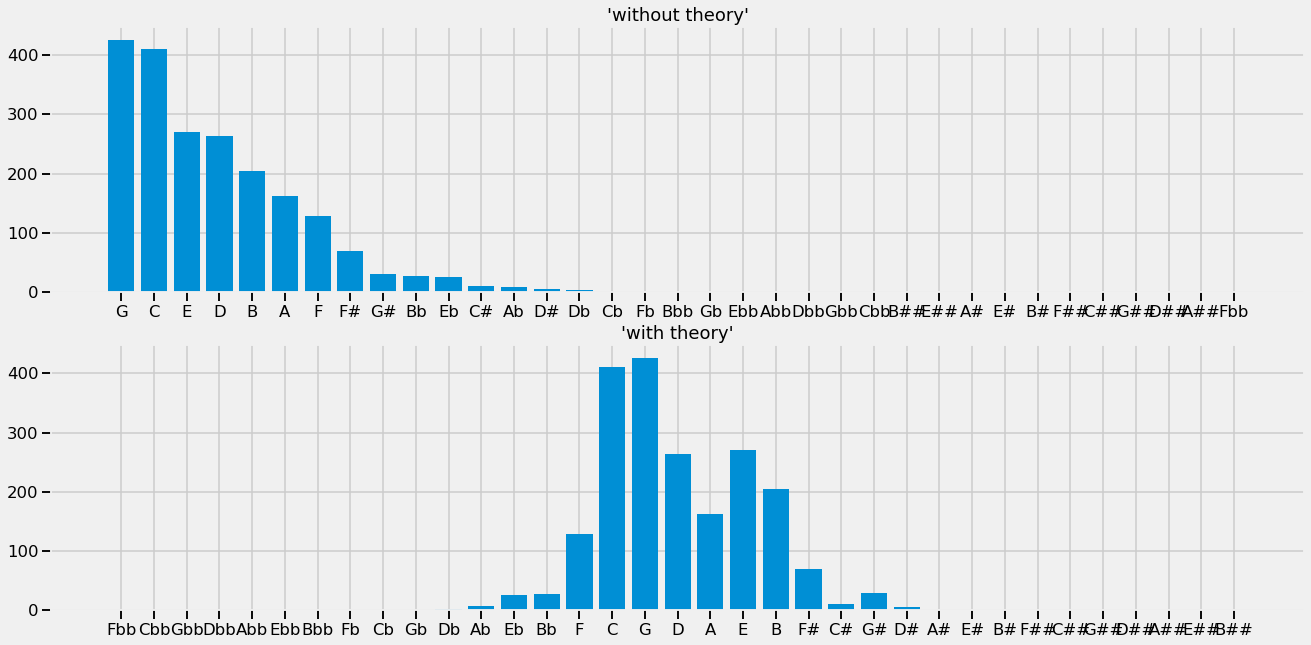

In [11]:
piece = tpc_counts.iloc[10]

fig, axes = plt.subplots(2, 1, figsize=(20,10))

axes[0].bar(piece.sort_values(ascending=False).index, piece.sort_values(ascending=False))
axes[0].set_title("'without theory'")

axes[1].bar(piece.index, piece)
axes[1].set_title("'with theory'")

# plt.savefig("img/random_piece.png")
# plt.show()

Let us have an overview of the note counts in these pieces!

If we would just look at the raw counts of the tonal pitch-classe, we could not learn much from it. 
Using a theoretical model (the line of fifths) shows that the notes in pieces are usually come from few adjacent keys (you don't say!).

We probably have very long pieces (sonatas) and very short pieces (songs) in the dataset. Since we don't want length (or the absolute number of notes in a piece) to have an effect, we rather consider tonal pitch-class distributions instead counts, by normalizing all pieces to sum to one.

In [12]:
tpc_dists = tpc_counts.div(tpc_counts.sum(axis=1), axis=0)
tpc_dists.sample(20)

,Fbb,Cbb,Gbb,Dbb,Abb,Ebb,Bbb,Fb,Cb,Gb,Db,Ab,Eb,Bb,F,C,G,D,A,E,B,F#,C#,G#,D#,A#,E#,B#,F##,C##,G##,D##,A##,E##,B##
606,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059524,0.059524,0.061905,0.235714,0.161905,0.147619,0.104762,0.057143,0.054762,0.045238,0.007143,0.004762,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1844,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005330,0.089552,0.171642,0.173774,0.143923,0.119403,0.148188,0.101279,0.023454,0.007463,0.011727,0.004264,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
251,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000424,0.027107,0.044473,0.035578,0.077086,0.159255,0.213892,0.154172,0.058026,0.085133,0.087251,0.043626,0.008895,0.002541,0.002118,0.000424,0.000000,0.0,0.0,0.0,0.0,0.0
737,0.0,0.0,0.0,0.0,0.017288,0.020018,0.014559,0.037307,0.093722,0.091902,0.030027,0.043676,0.228389,0.166515,0.088262,0.028207,0.008189,0.043676,0.083712,0.003640,0.000910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001466,0.003908,0.012702,0.013679,0.063019,0.200293,0.208109,0.128481,0.079140,0.132389,0.100147,0.034196,0.004885,0.014656,0.002931,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
822,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022222,0.133333,0.155556,0.044444,0.266667,0.155556,0.133333,0.088889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.003268,0.011438,0.024510,0.003268,0.039216,0.091503,0.207516,0.160131,0.065359,0.096405,0.169935,0.063725,0.014706,0.013072,0.016340,0.011438,0.008170,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
850,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081545,0.184549,0.184549,0.180258,0.124464,0.098712,0.133047,0.008584,0.004292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1609,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027883,0.093790,0.016477,0.062104,0.130545,0.309252,0.177440,0.032953,0.020279,0.102662,0.016477,0.010139,0.0,0.0,0.0,0.0,0.0
555,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002088,0.083507,0.171190,0.118998,0.068894,0.204593,0.173278,0.125261,0.006263,0.004175,0.033403,0.006263,0.002088,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


For further numerical analysis, we extract the data from this table and assign it to a variable `X`.

In [14]:
# extract values of table to matrix
X = tpc_dists.values

X.shape # shows (#rows, #columns) of X

(2012, 35)

Now, `X` is a 2012 $\times$ 35 matrix where the rows represent the pieces and the columns (also called "features" or "dimensions") represent the relative frequency of tonal pitch-classes.

Thinking in 35 dimensions is quite difficult for most people. Without trying to imagine what this would look like, what can we already say about this data?

Since each piece is a point in this 35-D space and pieces are represented as vectors, pieces that have similar tonal pitch-class distributions must be close in this space (whatever this looks like).

What groups of pieces that cluster together? Maybe pieces of the same composer are similar to each other? Maybe pieces from a similar time? Maybe pieces for the same instruments?

If we find clusters, these would still be in 35-D and thus difficult to interpret. Luckily, there are a range of so-called *dimensionality reduction* methods that transform the data into lower-dimensional spaces so that we actually can look at them. 

A very common dimensionality reduction method is **Principal Components Analysis (PCA)**. 

The basic idea of PCA is:

- find dimensions in the data that maximize the variance in this direction
- these dimensions have to be orthogonal to each other (mutually independent)
- these dimensions are called the *principal components*
- each principal component is associated with how much of the data variance it explains

In [15]:
import numpy as np # for numerical computations
import sklearn
from sklearn.decomposition import PCA # for dimensionality reduction

pca = sklearn.decomposition.PCA(n_components=35) # initialize PCA with 35 dimensions
pca.fit(X) # apply it to the data
variance = pca.explained_variance_ratio_ # assign explained variance to variable

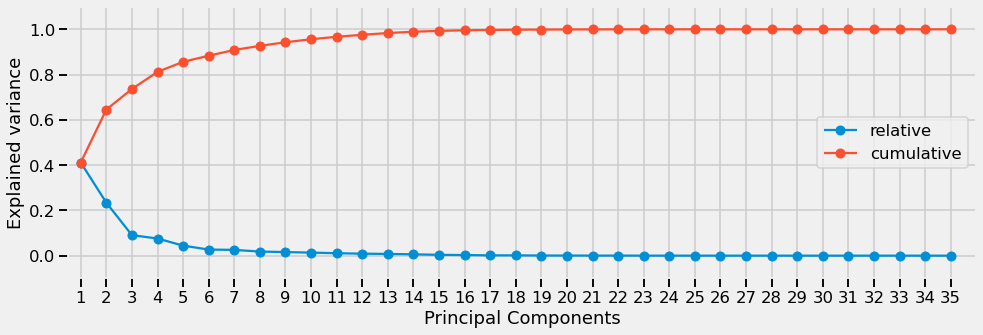

In [16]:
fig, ax = plt.subplots(figsize=(14,5))
x = np.arange(35)
ax.plot(x, variance, label="relative", marker="o")
ax.plot(x, variance.cumsum(), label="cumulative", marker="o")
ax.set_xlim(-0.5, 35)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel("Principal Components")
ax.set_ylabel("Explained variance")
plt.xticks(np.arange(len(lof)), np.arange(len(lof)) + 1) # because Pyhon starts counting at 0

plt.legend(loc="center right")
plt.tight_layout()
# plt.savefig("img/explained_variance.png")
# plt.show()

In [17]:
variance[:5]

array([0.41144591, 0.23410347, 0.09063507, 0.07574242, 0.04436989])

The first principal component explains 41.1% of the variance of the data, the second explains 23.4% and the third 9%. Together, this amounts to 73.6%. 

Almost three quarters of the variance in the dataset is retained by reducing the dimensionality from 35 to 3 dimensions (8.6%)!
If we reduce the data to two dimensions, we still can explain $\approx$ 65% of the variance.

This is great because it means that we can look at the data in 2 or 3 dimensions without loosing too much information.

## Recovering the line of fifths from data

In [18]:
pca3d = PCA(n_components=3)
pca3d.fit(X)

X_ = pca3d.transform(X)
X_.shape

(2012, 3)

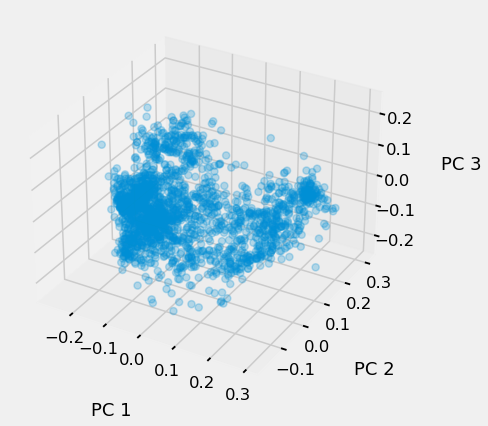

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_[:,0], X_[:,1], X_[:,2], s=50, alpha=.25) # c=cs,
ax.set_xlabel("PC 1", labelpad=30)
ax.set_ylabel("PC 2", labelpad=30)
ax.set_zlabel("PC 3", labelpad=30)

plt.tight_layout()
# plt.savefig("img/3d_scatter.png")
# plt.show()

Each piece in this plot is represented by a point in 3-D space. But remember that this location represents ~75% of the information contained in the full tonal pitch-class distribution.
In 35-D space each dimension corresponded to the relative frequency of a tonal pitch-class in a piece.

- What do these three dimensions signify?
- How can we interpret them? 

Fortunately, we can inspect them individually and try to interpret what we see.

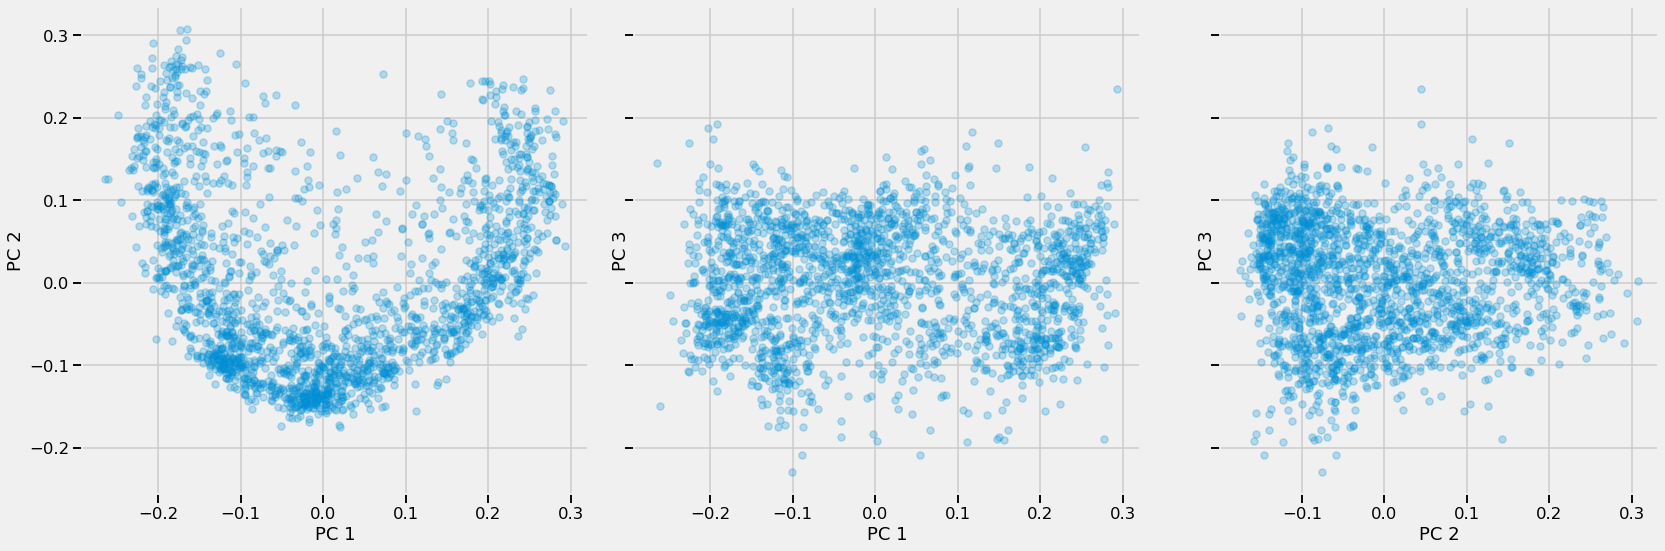

In [21]:
from itertools import combinations

fig, axes = plt.subplots(1,3, sharey=True, figsize=(24,8))

for k, (i, j) in enumerate(combinations(range(3), 2)):

    axes[k].scatter(X_[:,i], X_[:,j], s=50, alpha=.25, edgecolor=None)
    axes[k].set_xlabel(f"PC {i+1}")
    axes[k].set_ylabel(f"PC {j+1}")
    axes[k].set_aspect("equal")

plt.tight_layout()
# plt.savefig("img/3d_dimension_pairs.png")
# plt.show()

Clearly, looking at two principal components at a time shows that there is some latent structure in the data. How can we understand it better? 

One way to see whether the pieces are clustered together systematically be coloring them according to some criterion.

As always, many different options are available. For the present purpose we will use the most simple summary of the piece: its most frequent note (which is the *mode* of its pitch-class distribution in statistical terms) and call this note its **tonal center**.

This will also allow to map the tonal pitch-classes on the line of fifths to colors.

In [22]:
tpc_dists["tonal_center"] = tpc_dists.apply(lambda piece: np.argmax(piece[lof].values) - 15, axis=1)
tpc_dists.sample(10)

,Fbb,Cbb,Gbb,Dbb,Abb,Ebb,Bbb,Fb,Cb,Gb,Db,Ab,Eb,Bb,F,C,G,D,A,E,B,F#,C#,G#,D#,A#,E#,B#,F##,C##,G##,D##,A##,E##,B##,tonal_center
1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.002752,0.004587,0.015138,0.088991,0.138991,0.086239,0.117431,0.145413,0.195413,0.094037,0.015596,0.021560,0.055505,0.016972,0.001376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.001026,0.006028,0.020521,0.037194,0.037450,0.016673,0.087598,0.158138,0.225728,0.106579,0.106066,0.094395,0.078107,0.013467,0.002693,0.004232,0.003335,0.000770,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1
1857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.007370,0.031322,0.103639,0.081069,0.051589,0.111469,0.177338,0.224781,0.087517,0.038692,0.030401,0.037310,0.017503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3
1045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004902,0.000000,0.000000,0.122549,0.166667,0.151961,0.117647,0.127451,0.142157,0.102941,0.019608,0.019608,0.009804,0.014706,0.0,0.0,0.0,0.0,0.0,5
1246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01232,0.020534,0.008214,0.131417,0.185832,0.320329,0.091376,0.030801,0.128337,0.070842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-3
214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001401,0.022409,0.082633,0.122549,0.086835,0.147759,0.169468,0.156863,0.111345,0.032913,0.020308,0.037815,0.007003,0.000700,0.0,0.0,0.0,0.0,0.0,7
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000388,0.028306,0.053121,0.065142,0.099651,0.153160,0.186506,0.141528,0.075611,0.089182,0.072896,0.031020,0.001939,0.000775,0.000775,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4
570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004454,0.028211,0.006682,0.092799,0.171492,0.178916,0.163326,0.086117,0.112843,0.121752,0.029696,0.003712,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3
586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.001506,0.006274,0.041405,0.095609,0.121957,0.107152,0.117440,0.169887,0.146048,0.090088,0.039649,0.021330,0.025094,0.016562,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2
684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001412,0.072034,0.159605,0.190678,0.176554,0.105932,0.149718,0.103107,0.026836,0.011299,0.002825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1


In [23]:
from matplotlib import cm
from matplotlib.colors import Normalize

#normalize item number values to colormap
norm = Normalize(vmin=-15, vmax=20)

# cs = [ cm.seismic(norm(c)) for c in data["tonal_center"]]
cs = [ cm.seismic(norm(c)) for c in tpc_dists["tonal_center"]]

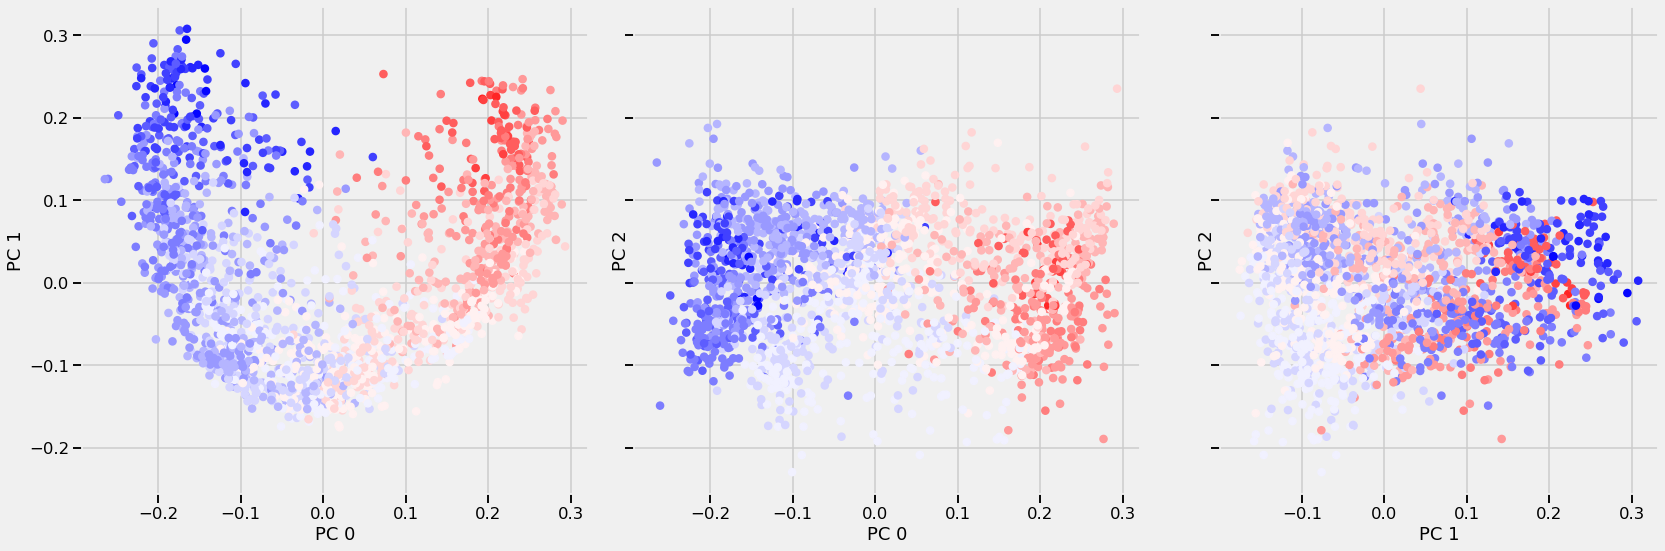

In [24]:
from itertools import combinations

fig, axes = plt.subplots(1,3, sharey=True, figsize=(24,8))

for k, (i, j) in enumerate(combinations(range(3), 2)):

    axes[k].scatter(X_[:,i], X_[:,j], s=50, c=[ np.abs(c) for c in cs], edgecolor=None)
    axes[k].set_xlabel(f"PC {i}")
    axes[k].set_ylabel(f"PC {j}")
    axes[k].set_aspect("equal")

plt.tight_layout()
# plt.savefig("img/3d_dimension_pairs_colored.png")
# plt.show()

## Historical development of tonality

The line of fifths is an important underlying structure for pitch-class distributions in tonal compositions

But we have treated all pieces in our dataset as synchronic and have not yet taken their historical location into account.

Let's assume the pitch-class content of a piece spreads on the line of fifths from F to A$\sharp$. 
This means, its range on the line of fifths is $10 - (-1) = 11$. The piece covers eleven consecutive fifths on the lof.

We can generalize this calculation and write a function that calculates the range for each piece in the dataset.

In [25]:
def lof_range(piece):
    l = [i for i, v in enumerate(piece) if v!=0]
    return max(l) - min(l)

In [26]:
data["lof_range"] = data.loc[:, lof].apply(lof_range, axis=1) # create a new column
data.sample(20)

,composer,composer_first,work_group,work_catalogue,opus,no,mov,title,composition,publication,source,display_year,Fbb,Cbb,Gbb,Dbb,Abb,Ebb,Bbb,Fb,Cb,Gb,Db,Ab,Eb,Bb,F,C,G,D,A,E,B,F#,C#,G#,D#,A#,E#,B#,F##,C##,G##,D##,A##,E##,B##,lof_range
992,Agricola,Alexander,Missa Malheur me bat,NaN,NaN,NaN,NaN,Gloria,NaN,1506.0,ELVIS,1506.0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,218,386,327,274,333,351,298,5,3,7,0,0,0,0,0,0,0,0,0,0,0,10
1772,Corelli,Arcangelo,12 Trio Sonatas,Op.,4,1,3.0,NaN,NaN,1694.0,CCARH,1694.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,50,47,27,39,53,38,4,2,7,2,0,0,0,0,0,0,0,0,0,0,10
1199,Scarlatti,Domenico,Sonata,K,64,NaN,NaN,NaN,NaN,NaN,MS,1721.0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,62,32,60,89,129,72,17,3,22,11,0,0,0,0,0,0,0,0,0,0,0,10
1361,Scriabin,Alexander,Préludes,Op.,13,2,NaN,6 Preludes,1895.0,NaN,DCML,1895.0,0,0,0,0,0,0,0,0,0,0,0,0,8,6,78,61,27,40,91,70,46,4,3,12,16,4,0,0,0,0,0,0,0,0,0,13
1490,Tchaikovsky,Pyotr,The Seasons,Op.,37a,3,NaN,March: Song of the Lark,1876.0,NaN,MS,1876.0,0,0,0,0,0,0,0,0,0,3,0,0,24,107,17,48,126,158,71,1,4,52,13,2,0,0,0,0,0,0,0,0,0,0,0,14
387,Chopin,Frédéric,Préludes,Op.,28,6,NaN,24 Préludes,1839.0,NaN,MS,1839.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20,41,80,4,28,106,66,33,3,0,22,2,0,1,0,0,0,0,0,0,14
290,Alkan,Charles Valentin,Préludes,Op.,31,13,NaN,NaN,1846.0,NaN,MS,1846.0,0,0,0,0,1,7,22,3,108,201,263,110,69,228,150,10,1,20,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15
478,Bach,Johann Sebastian,Inventions and Sinfonias,BWV,789,NaN,NaN,NaN,NaN,1723.0,MS,1723.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,82,77,103,98,101,109,68,23,13,8,5,0,0,0,0,0,0,0,0,12
1947,Mozart,Wolfgang Amadeus,Sonaten,KV,283,5,3.0,NaN,1774.0,NaN,CCARH,1774.0,0,0,0,0,0,0,0,0,0,0,0,0,8,9,29,183,367,317,245,184,269,199,70,33,32,38,1,0,0,0,0,0,0,0,0,14
601,Couperin,François,Troisième livre de pièces de Clavecin,NaN,NaN,18,4.0,Le petit rien,NaN,1722.0,MS,1722.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,29,55,56,51,28,44,29,4,0,0,0,0,0,0,0,0,0,0,0,8


This allows us now to take the `display_year` (composition or publication) and `lof_range` (range on the line of fifths) features to observe historical changes.

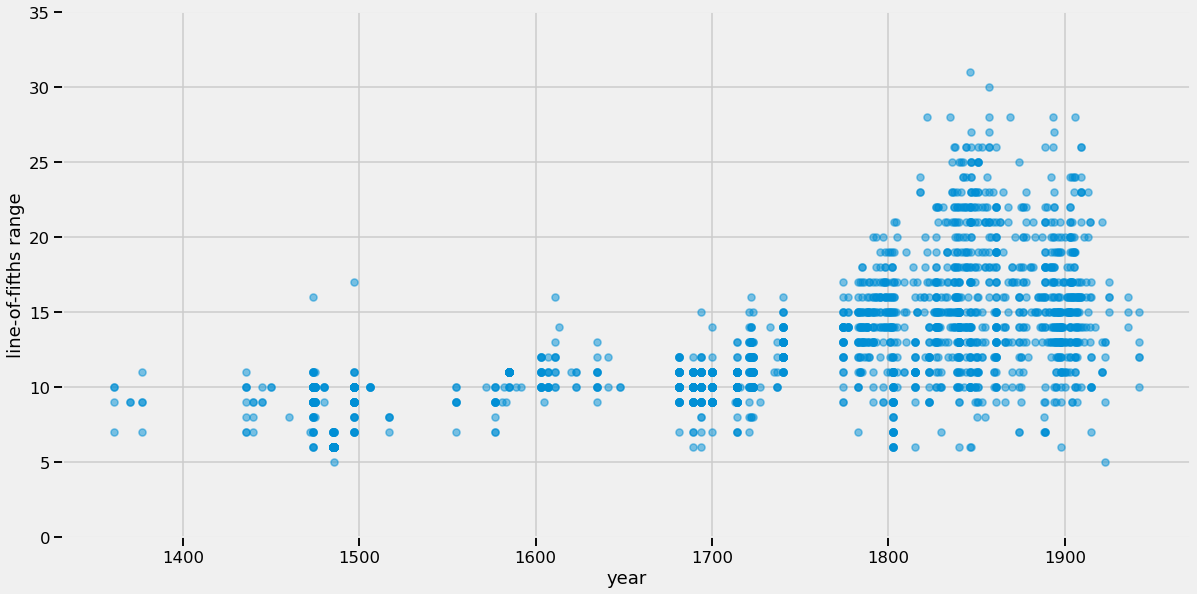

In [30]:
fig, ax = plt.subplots(figsize=(18,9))
ax.scatter(data["display_year"].values, data["lof_range"].values, alpha=.5, s=50)
ax.set_ylim(0,35)
ax.set_xlabel("year")
ax.set_ylabel("line-of-fifths range");
# plt.savefig("img/hist_scatter.png");

We could try to fit a line to this data to see whether there is a trend (kinda obvious here).

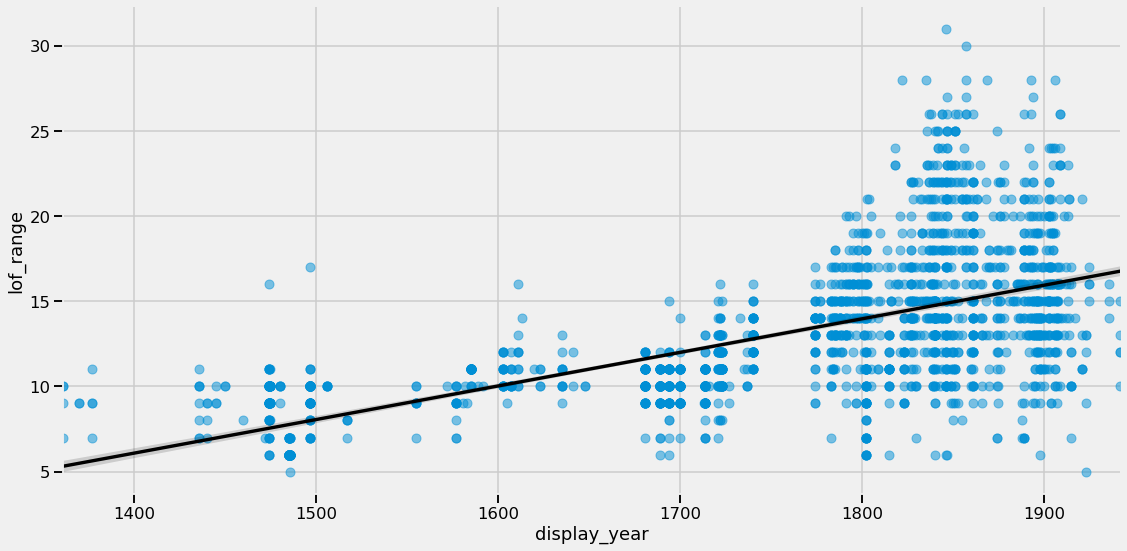

In [32]:
g = sns.lmplot(
    data=data, 
    x="display_year", 
    y="lof_range", 
    line_kws={"color":"k"},
    scatter_kws={"alpha":.5},
#     lowess=True,
    height=8,
    aspect=2
);
# g.savefig("img/hist_scatter_line.png");

But actually, this is not the best idea. Why should any historical process be linear? More complex models might make more sense.

A more versatile technique is *Locally Weighted Scatterplot Smoothing* (LOWESS) that locally fits a polynomial. Using this method, we see that a non-linear process is displayed.

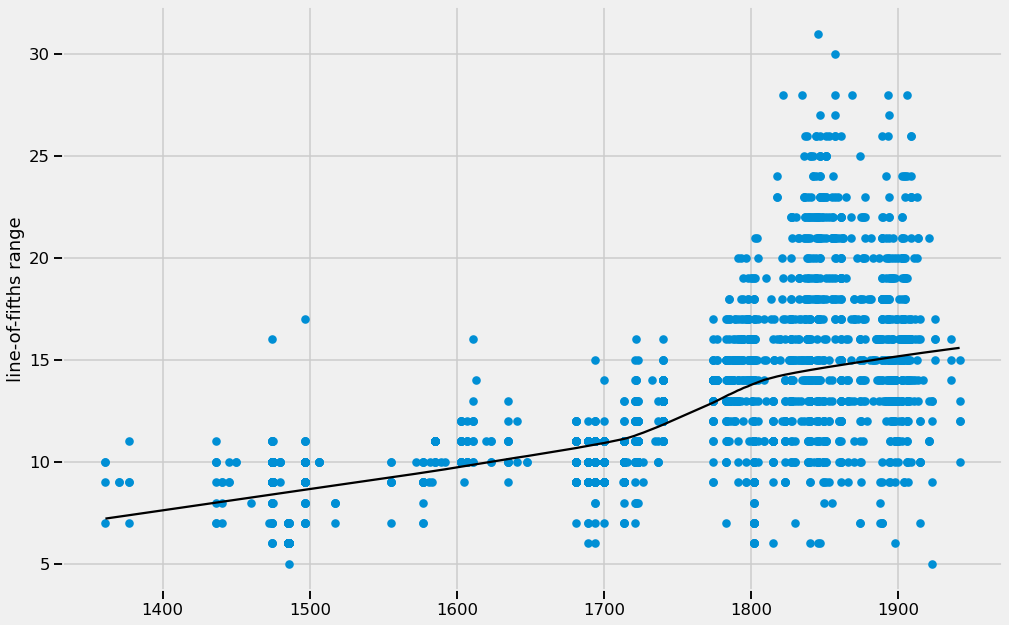

In [34]:
from statsmodels.nonparametric.smoothers_lowess import lowess

x = data.display_year
y = data.lof_range
l = lowess(y,x)

fig, ax = plt.subplots(figsize=(15,10))

ax.scatter(x,y, s=50)
ax.plot(l[:,0], l[:,1], c="k")
ax.set_ylabel("line-of-fifths range");
# plt.savefig("img/hist_scatter_lowess.png")
# plt.show()

## If there is time: some more advanced stuff

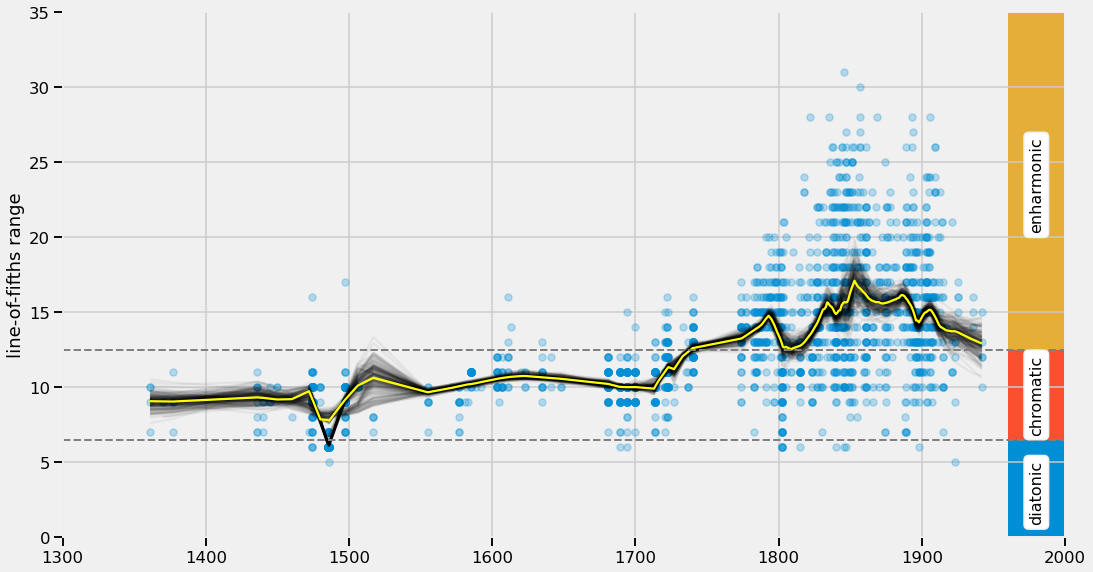

In [35]:
B = 200
delta = 1/10 

fig, ax = plt.subplots(figsize=(16,9))

x = data.display_year
y = data.lof_range
l = lowess(y,x, frac=delta)

ax.scatter(x,y, s=50, alpha=.25)

for _ in range(B):
    resampled = data.sample(data.shape[0], replace=True)
    
    xx = resampled.display_year
    yy = resampled.lof_range
    ll = lowess(yy,xx, frac=delta)
    
    ax.plot(ll[:,0], ll[:,1], c="k", alpha=.05)
    
ax.plot(l[:,0], l[:,1], c="yellow")

## REGIONS
from matplotlib.patches import Rectangle

text_kws = {
    "rotation" : 90,
    "fontsize" : 16,
    "bbox" : dict(
        facecolor="white", 
        boxstyle="round"
    ),
    "horizontalalignment" : "center",
    "verticalalignment" : "center"
}

rect_props = {
    "width" : 40,
    "zorder" : -1,
    "alpha" : 1.
}

stylecolors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

ax.text(1980, 3, "diatonic", **text_kws)
ax.axhline(6.5, c="gray", linestyle="--", lw=2) # dia / chrom.
ax.add_patch(Rectangle((1960,0), height=6.5, facecolor=stylecolors[0], **rect_props))

ax.text(1980, 9.5, "chromatic", **text_kws)
ax.axhline(12.5, c="gray", linestyle="--", lw=2) # chr. / enh.
ax.add_patch(Rectangle((1960,6.5), height=6, facecolor=stylecolors[1], **rect_props))

ax.text(1980, 23.5, "enharmonic", **text_kws)
ax.add_patch(Rectangle((1960,12.5), height=28, facecolor=stylecolors[2], **rect_props))

ax.set_ylim(0,35)
ax.set_xlim(1300,2000)

ax.set_ylabel("line-of-fifths range");
# plt.savefig("img/final.png", dpi=300)
# plt.show()

Usung bootstrap sampling we achieve an estimation of the local varience of the data and thus of the diversity in the note usage of the musical pieces.

We also can distinguish three regions in terms of line-of-fifth range: diatonic, chromatic, and enharmonic.

Grouping the data together in these three regions, we see a clear change from diatonic and chromatic to chromatic and enharmonic pieces over the course of history.

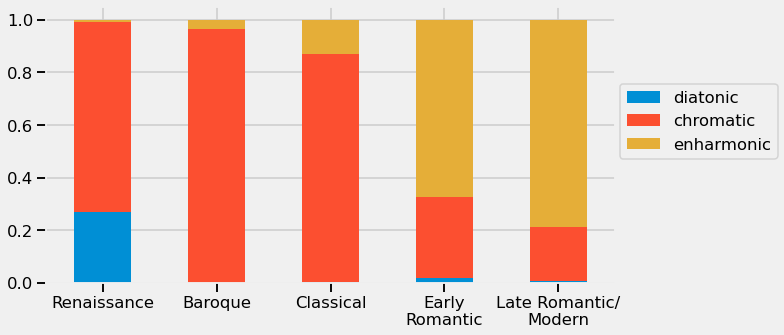

In [36]:
epochs = {
    "Renaissance" : [1300, 1549],
    "Baroque" : [1550, 1649],
    "Classical" : [1650, 1749],
    "Early\nRomantic" : [1750, 1819],
    "Late Romantic/\nModern" : [1820, 2000]
}   

strata = [
    "diatonic",
    "chromatic",
    "enharmonic"
]

widths = data[["display_year", "lof_range"]].sort_values(by="display_year").reset_index(drop=True)

df = pd.concat(
    [
        widths[ 
            (widths.display_year >= epochs[e][0]) & (widths.display_year <= epochs[e][1]) 
        ]["lof_range"].value_counts(normalize=True).sort_index().groupby( 
            lambda x: strata[0] if x <= 6 else strata[1] if x <= 12 else strata[2]
        ).sum() for e in epochs
    ], axis=1, sort=True
)

df.columns = epochs.keys()
df = df.reindex(strata)
df.T.plot(kind="bar", stacked=True, figsize=(12,5))
# plt.title("Epochs")
plt.legend(bbox_to_anchor=(1.3,0.75))
plt.gca().set_xticklabels(epochs.keys(), rotation="horizontal")
plt.tight_layout()
# plt.savefig("img/epochs_regions.png")
plt.show()

- Renaissance: largest diatonic proportion overall but mostly chromatic
- Baroque: alost completely chromatic
- Classical: enharmonic proportion increases -> more distant modulations
- This trend continues through the Romantic eras

## Summary

1. We have analyzed a very specific aspect of Western classical music.
2. We have used a large(-ish) corpus to answer our research question.
3. We have operationalized musical pieces as vectors that represent distributions of tonal pitch-classes.
4. We have used the dimensionality-reduction technique Principal Component Analysis (PCA) in order to visually inspect the distribution of the data in 2 and 3 dimensions.
5. We have used music-theoretical domain knowledge to find meaningful structure in this space.
6. We have seen that pieces are largely distributed along the line of fifths.
7. We have used Locally Weighted Scatterplot Smoothing (LOWESS) to estimate the variance in this historical process.
8. We have seen that, historically, composers explore ever larger regions on this line and that the variance also increases.
